In [9]:
# essential libraries
import cv2, matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# read the image
image = cv2.imread('downloads/cups.jpg')

In [11]:
# create copy of the original image
image_copy = np.copy(image)

In [12]:
# convert original image to gray
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [13]:
# perform 7x7 gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (7, 7), 0)

In [14]:
# find the edges
cup_edges = cv2.Canny(blurred_image, threshold1=90, threshold2=110)
print(cup_edges)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
# find the circles in the image
circles = cv2.HoughCircles(cup_edges, cv2.HOUGH_GRADIENT, dp=1.5, minDist=50, minRadius=20, maxRadius=130)
print(circles)
print(circles[0])

[[[198.75 366.75  53.15]
  [270.75 249.75  68.  ]
  [312.75 384.75  41.6 ]]]
[[198.75 366.75  53.15]
 [270.75 249.75  68.  ]
 [312.75 384.75  41.6 ]]


In [22]:
# remove the extra nesting
circles = circles[0]

In [23]:
# highlight the detected circles
for (x, y, r) in circles:
    x, y, r = int(x), int(y), int(r)
    cv2.circle(image_copy, (x, y), r, (255, 255, 0), 4)

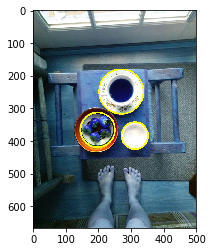

In [24]:
plt.imshow(image_copy)